***Hello World***

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
# data = pd.read_csv("./Processed Data/preprocessedNP.csv")
data = pd.read_csv('./Processed Data/preprocessedwithStress.csv')
# data = pd.read_csv('./Processed Data/preprocessedNPWithWords.csv')
data.columns = ['useless','text', 'label']
# data.columns = ['text', 'label']

In [114]:
data.head(5)

,useless,text,label
0,0,"He said he had not felt that way before, sugge...",1
1,1,"Hey there r/assistance, Not sure if this is th...",0
2,2,My mom then hit me with the newspaper and it s...,1
3,3,"until i met my new boyfriend, he is amazing, h...",1
4,4,October is Domestic Violence Awareness Month a...,1


In [115]:
data.drop('useless',axis=1,inplace=True)

In [116]:
data

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
5136,this is jimin to yoongi unhappy .2,1
5137,yes it would have if it hadn't been for those...,0
5138,need moodbooster juseyo unhappy,1
5139,congratyoulations Harry!!!!! Been with you sin...,1


In [117]:
import nltk
import re
# nltk.download('stopwords')
# stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    # text = [stemmer.stem(word) for word in text.split(' ')]
    return text
data["text"] = data["text"].apply(clean)


In [118]:
data['text']

0       said felt way suggeted go rest trigger ahead y...
1       hey rassistance sure right place post goes  im...
2       mom hit newspaper shocked would knows dont lik...
3       met new boyfriend amazing kind sweet good stud...
4       october domestic violence awareness month dome...
                              ...                        
5136                               jimin yoongi unhappy  
5137                yes would hadnt meddling clouds smile
5138                    need moodbooster juseyo unhappy  
5139    congratyoulations harry since fifa  miss yoyou...
5140              iiiii would like boook   fuck unhappy  
Name: text, Length: 5141, dtype: object

In [119]:
def remove(text):
    text=" ".join(text.split('   '))
    return text    

data["text"] = data["text"].apply(remove)

In [120]:
data['text']

0       said felt way suggeted go rest trigger ahead y...
1       hey rassistance sure right place post goes  im...
2       mom hit newspaper shocked would knows dont lik...
3       met new boyfriend amazing kind sweet good stud...
4       october domestic violence awareness month dome...
                              ...                        
5136                               jimin yoongi unhappy  
5137                yes would hadnt meddling clouds smile
5138                    need moodbooster juseyo unhappy  
5139    congratyoulations harry since fifa  miss yoyou...
5140                iiiii would like boook fuck unhappy  
Name: text, Length: 5141, dtype: object

***Now, Labeling the the Text, [Stress,No Stress]***

In [121]:
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head())

                                                text      label
0  said felt way suggeted go rest trigger ahead y...     Stress
1  hey rassistance sure right place post goes  im...  No Stress
2  mom hit newspaper shocked would knows dont lik...     Stress
3  met new boyfriend amazing kind sweet good stud...     Stress
4  october domestic violence awareness month dome...     Stress


In [122]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.33,random_state=42)

In [123]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
model = BernoulliNB()
model.fit(xtrain, ytrain)
# print("Accuracy of Logistic Regression model is:",
# metrics.accuracy_score(ytest, ytrain)*100)

BernoulliNB()

In [124]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

['No Stress']


In [125]:
scores = []
scores.append(model.score(xtest,ytest))
# scoresdf
# dict = {'Algorithm':'Naive Bayes','Score':model.score(xtest,ytest)}
# scoresdf  = scoresdf.append(dict, ignore_index = True)
model.score(xtest,ytest)*100


80.61284619917501

In [126]:
from sklearn.metrics import classification_report
pred_bern = model.predict(xtest)
print(classification_report(ytest, pred_bern))

              precision    recall  f1-score   support

   No Stress       0.82      0.76      0.79       802
      Stress       0.80      0.85      0.82       895

    accuracy                           0.81      1697
   macro avg       0.81      0.80      0.80      1697
weighted avg       0.81      0.81      0.81      1697



In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_bern)

array([[608, 194],
       [135, 760]], dtype=int64)

In [128]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(xtrain,ytrain)

LogisticRegression()

In [129]:
scores.append(model2.score(xtest,ytest))
model2.score(xtest,ytest)*100
dict = {'Algorithm':'LogisticRegression','Score':model2.score(xtest,ytest)}
# scoresdf  = scoresdf.append(dict, ignore_index = True)

In [130]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model2.predict(data)
print(output)

['No Stress']


In [131]:
from sklearn.metrics import confusion_matrix
pred_logis = model2.predict(xtest)
confusion_matrix(ytest,pred_logis)

array([[669, 133],
       [206, 689]], dtype=int64)

In [132]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(xtrain,ytrain)


DecisionTreeClassifier()

In [133]:
scores.append(model3.score(xtest,ytest))
model3.score(xtest,ytest)*100

72.95226870948733

In [134]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model3.predict(data)
print(output)

['No Stress']


In [135]:
pred_decs = model3.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_decs)

array([[603, 199],
       [260, 635]], dtype=int64)

Text(69.0, 0.5, 'truth')

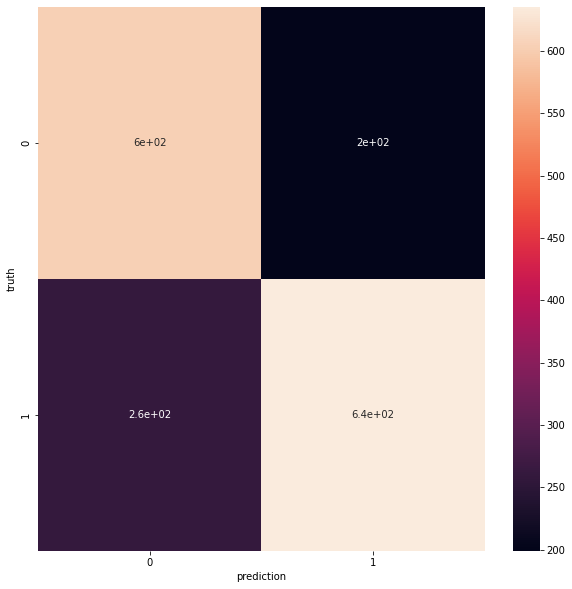

In [136]:
plt.figure(figsize=(10,10))
sn.heatmap(confusion_matrix(ytest,pred_decs),annot=True)
plt.xlabel('prediction')
plt.ylabel('truth')

In [137]:
from sklearn.neighbors import KNeighborsClassifier
model4= KNeighborsClassifier()
model4.fit(xtrain,ytrain)

KNeighborsClassifier()

In [138]:
scores.append(model4.score(xtest,ytest))
model4.score(xtest,ytest)*100

71.3022981732469

In [139]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model4.predict(data)
print(output)

['No Stress']


In [140]:
pred_knn = model4.predict(xtest)

In [141]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_knn)

array([[694, 108],
       [379, 516]], dtype=int64)

In [142]:
from sklearn.svm import SVC
model5 = SVC(C=2)
model5.fit(xtrain,ytrain)

SVC(C=2)

In [143]:
model5.score(xtest,ytest)*100

80.61284619917501

In [144]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model5.predict(data)
print(output)

['No Stress']


In [145]:
pred_svm=model5.predict(xtest)

In [146]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_svm)

array([[675, 127],
       [202, 693]], dtype=int64)

In [147]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier()
model6.fit(xtrain,ytrain)

RandomForestClassifier()

In [148]:
model6.score(xtest,ytest)

0.8049499116087213

In [149]:
pred_rand = model6.predict(xtest)

In [150]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model6.predict(data)
check = output
print(output)

['No Stress']


In [151]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_rand)

array([[657, 145],
       [186, 709]], dtype=int64)

In [152]:
dict = {'Algo':['NaiveBayes','LogisticRegression','DecisionTree','KNN','SVC','RandomForest'],
        'Score':[model.score(xtest,ytest),model2.score(xtest,ytest),model3.score(xtest,ytest),model4.score(xtest,ytest),
                 model5.score(xtest,ytest),model6.score(xtest,ytest)]}
scoresdf = pd.DataFrame.from_dict(dict)

In [153]:
scoresdf

,Algo,Score
0,NaiveBayes,0.806128
1,LogisticRegression,0.800236
2,DecisionTree,0.729523
3,KNN,0.713023
4,SVC,0.806128
5,RandomForest,0.804950


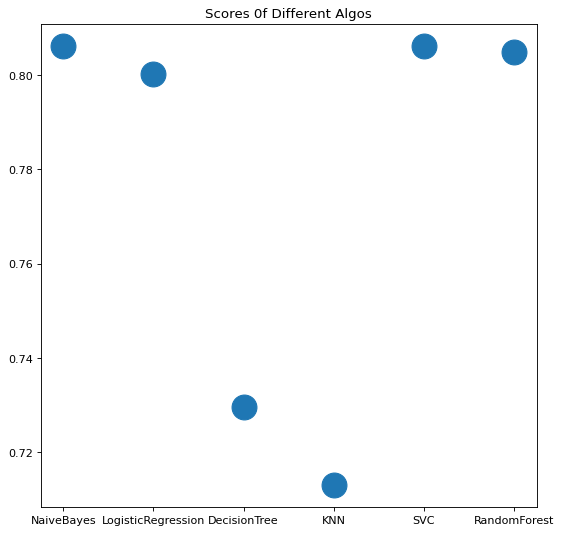

In [154]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(scoresdf['Algo'],scoresdf['Score'],s=500)
plt.title("Scores 0f Different Algos")
plt.show()

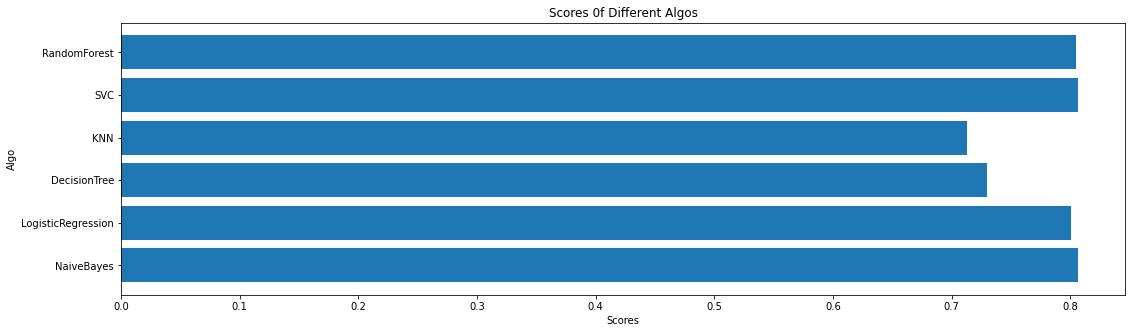

In [155]:
x,y = scoresdf['Algo'],scoresdf['Score']
f, ax = plt.subplots(figsize=(18,5))
# y = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1])
plt.barh(x, y)
plt.ylabel("Algo")
plt.xlabel('Scores')
plt.title("Scores 0f Different Algos")
plt.show()